# TLS Risley Prism Scanner Demo
Notebook: Hannah Weiser & Sina Zumstein, 2023

This demo scene showcases toyblock models scanned by a terrestial laser scanner with a risley prism. This scanning technology uses a non-repetitive scan pattern, which means the point density depends on the integration time.

We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
from IPython.display import Code
from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

In [2]:
import os

os.chdir("..")

## Survey
Let us look at the XML files in the simulation. First, we investigate the survey XML file, `tls_livox.xml`. We see that we actually use a moving platform of type `linearpath` to simulate the **static** platform, as a way to configure the **integration time**.

In [3]:
Code(display_xml("data/surveys/demo/tls_risley2.xml"), language="xml")

<document>
    <survey name="tls_toyblocks_livox" scene="data/scenes/demo/box_scene.xml#box_scene" platform="data/platforms.xml#simple_linearpath" scanner="data/scanners_tls.xml#livox_mid-70-RISLEY2">
        
        <!--<scannerMount x="0" y="0" z="2.0">
        </scannerMount>-->

        <FWFSettings binSize_ns="0.2" beamSampleQuality="3" />
        
        <leg>
        <!-- minimal leg 3: 0.01 m with speed of 0.005 m/s = 2 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="-10.01" y="-15.0" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="true" scanAngle_deg="35" pulseFreq_hz="100" headRotatePerSec_deg="0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="-10.0" y="-15.0" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="false" scanAngle_deg="35" pulseFreq_hz="100" headRotatePerSec_deg="0" />
        </leg>
        
    </survey>
</document>

There are six `leg` elements corresponding to three scan positions (SPs) at around x="-10" y="-15". Between the legs, the platform moves a very small distance along the x axis (0.01 m) with a certain speed (`movePerSec_m`). With decreasing speed, the time between the legs, i.e., the integration time, increases and so does the resulting point density. The first SP has the shortest integration time with 0.2 s, the second SP uses an integration time of 1 s and the third SP uses an integration time of 2 s.

## Scanner
Now let's have a look how a scanner with a risley prism is defined. Here, the [`livox_mid-70`](https://www.livoxtech.com/de/mid-70), defined in `data/scanners_tls.xml` is used:

In [4]:
Code(
    display_xml("python/pyhelios/data/scanners_tls.xml", "livox_mid-70-RISLEY2"),
    language="XML",
)

<scanner id="livox_mid-70-RISLEY2" accuracy_m="0.02" beamDivergence_rad="0.0027" name="Livox Mid-70-RISLEY2" optics="risley2" pulseFreqs_Hz="100000" pulseLength_ns="4" rangeMin_m="2" scanAngleMax_deg="35" scanAngleEffectiveMax_deg="35" wavelength_nm="905" rotorFreq1_Hz="99" rotorFreq2_Hz="199" rotorFreq3_Hz="-151" prism1_angle_deg="10.0" prism2_angle_deg="10.0" prism3_angle_deg="10.0" prism1_thickness="5.0" prism2_thickness="5.0" prism3_thickness="5.0" prism1_radius="20.0" prism2_radius="20.0" prism3_radius="20.0" distance_prism1_2="100.0" distance_prism2_3="100.0" refrIndex_prism1="1.575" refrIndex_prism2="1.575" refrIndex_prism3="1.575" refrIndex_air="1.0">
				
		<FWFSettings beamSampleQuality="3" />
		<beamOrigin x="0" y="0" z="0">

			<rot axis="z" angle_deg="-90" />
		</beamOrigin>

		<headRotateAxis x="1" y="0" z="0" />
	</scanner>

For this deflector type, the scan pattern is controlled by the rotation speeds (`rotorFreq1_Hz` and `rotorFreq2_Hz`) of two rotating risley prisms. This design on which the low-cost Livox scanners are based is described in detail in [Liu et al. (2022)](https://doi.org/10.1109/TMECH.2021.3058173).

More information on the Livox sensors and their point cloud characteristics can be obtained from the [Livox Wiki](https://livox-wiki-en.readthedocs.io/en/latest/introduction/Point_Cloud_Characteristics_and_Coordinate_System%20.html).

For further reading on rotational risley prisms, see [Duma & Schitea (2018)](https://acad.ro/sectii2002/proceedings/doc2018-1/08.pdf).

## Scene

Finally, let us take a look at the scene, `box_scene` in `data/scenes/demo/box_scene.xml`:

In [5]:
Code(display_xml("data/scenes/demo/box_scene.xml", "box_scene"))

<scene id="box_scene" name="box_scene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/box/box100.obj" />
            </filter>
        </part>
    </scene>

This is a simple scene, sonsisting of a cubix box (`box100.obj`) of 100 x 100 x 100 units, which is centered at the origin O(0,0,0). We typically use this scene for debugging purposes, because no shots get lost when scanning from within the box and the planar surfaces allow to control the scan pattern.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [12]:
!helios data/surveys/demo/tls_risley2.xml -q
output_path = find_playback_dir("data/surveys/demo/tls_risley2.xml")

rotorSpeed_rad_1 = 15.7563
rotorSpeed_rad_2 = 31.6718
rotorSpeed_rad_3 = -24.0324
tan(prism1_angle_rad): 0.176327
tan(prism2_angle_rad): 0.176327
tan(prism3_angle_rad): 0.176327
Prism1ThicknessOnZAxis: 2.76327
Prism2ThicknessOnZAxis: 2.76327
Prism3ThicknessOnZAxis: 2.76327
Prism1Point1ZAxis: (0, 0, 0)
Prism1Point2ZAxis: (0, 0, 2.76327)
Prism2Point1ZAxis: (0, 0, 4.76327)
Prism3Point1ZAxis: (0, 0, 9.52654)
Prism3Point2ZAxis: (0, 0, 12.2898)
beam32: (-0.305186, -0.00249987, 0.95229)
beam32: (-0.304911, -0.00499699, 0.952368)
beam32: (-0.304454, -0.00748862, 0.952497)
beam32: (-0.303815, -0.00997203, 0.952679)
beam32: (-0.302993, -0.0124445, 0.952911)
beam32: (-0.30199, -0.0149033, 0.953194)
beam32: (-0.300807, -0.0173458, 0.953527)
beam32: (-0.299443, -0.0197693, 0.953909)
beam32: (-0.2979, -0.0221713, 0.95434)
beam32: (-0.296178, -0.0245491, 0.954817)
beam32: (-0.29428, -0.0269003, 0.955341)
beam32: (-0.292206, -0.0292223, 0.955909)
beam32: (-0.289957, -0.0315127, 0.956521)
beam32: (-0.2

## The results 
Now we can display the point cloud

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Loading points from", Path(output_path))

sp_1 = np.loadtxt(Path(output_path) / "leg000_points.xyz")
sp_2 = np.loadtxt(Path(output_path) / "leg002_points.xyz")
sp_3 = np.loadtxt(Path(output_path) / "leg004_points.xyz")
print(sp_1.shape)
print(sp_2.shape)
print(sp_3.shape)

Loading points from /home/thomas/repositories/helios/output/tls_toyblocks_livox/2025-07-02_17-54-45


FileNotFoundError: /home/thomas/repositories/helios/output/tls_toyblocks_livox/2025-07-02_17-54-45/leg002_points.xyz not found.

NameError: name 'sp_2' is not defined

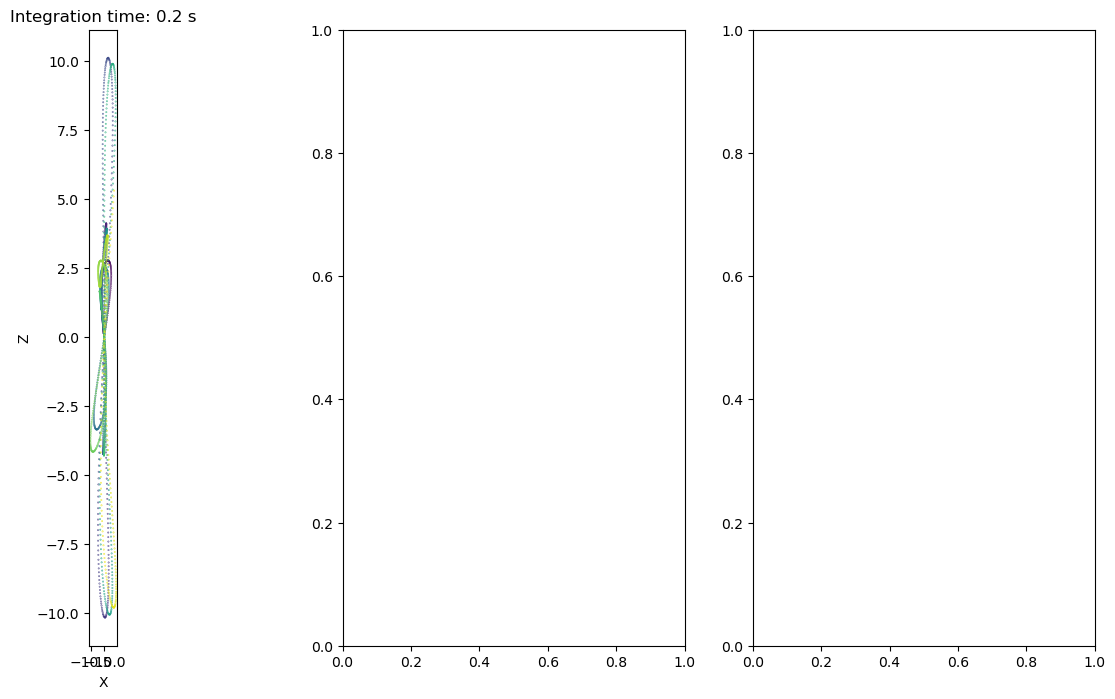

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(sp_1[:, 0], sp_1[:, 2], s=0.1, c=sp_1[:, 10])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Integration time: 0.2 s")
ax1.set_aspect("equal", "box")

ax2.scatter(sp_2[:, 0], sp_2[:, 2], s=0.1, c=sp_2[:, 10])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Integration time: 1 s")
ax2.set_aspect("equal", "box")

ax3.scatter(sp_3[:, 0], sp_3[:, 2], s=0.1, c=sp_3[:, 10])
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("Integration time: 2 s")
ax3.set_aspect("equal", "box")

plt.show()

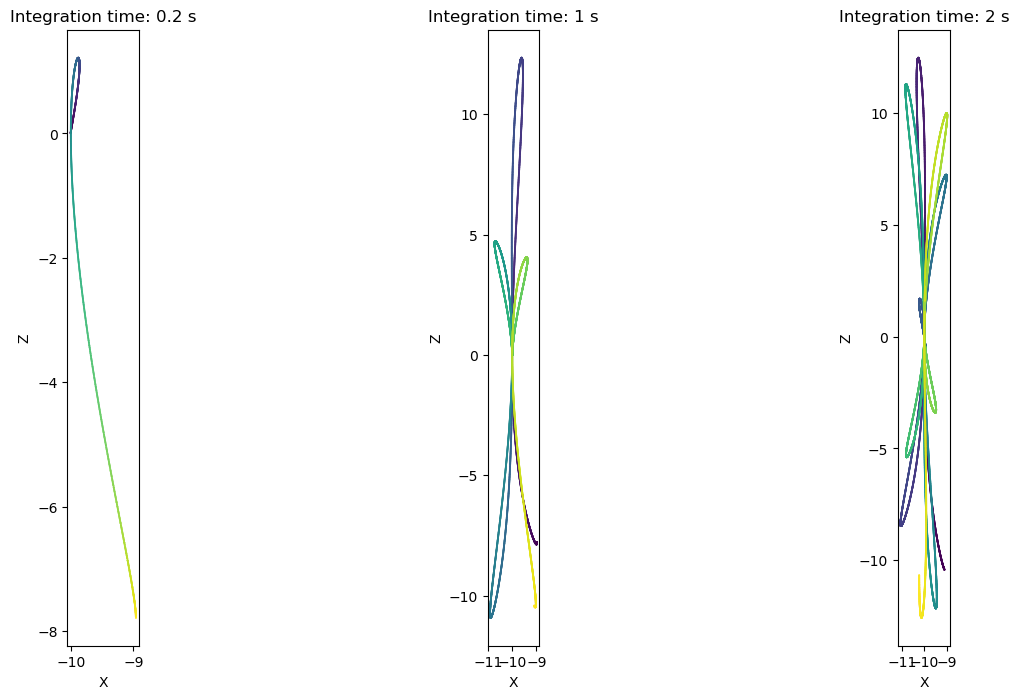

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(sp_1[:, 0], sp_1[:, 2], s=0.1, c=sp_1[:, 10])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Integration time: 0.2 s")
ax1.set_aspect("equal", "box")

ax2.scatter(sp_2[:, 0], sp_2[:, 2], s=0.1, c=sp_2[:, 10])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Integration time: 1 s")
ax2.set_aspect("equal", "box")

ax3.scatter(sp_3[:, 0], sp_3[:, 2], s=0.1, c=sp_3[:, 10])
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("Integration time: 2 s")
ax3.set_aspect("equal", "box")

plt.show()

We can see a **nonrepeating** pattern, where with increasing integration time, the point density increases. This is different for other deflector types, such as rotating mirrors, where the scanner itself needs to move or rotate in order to result in a nonrepeating pattern.
As stated in [Liu et al. (2022)](https://doi.org/10.1109/TMECH.2021.3058173), the scanning mechanisms results in a **retina-like** scanning pattern, with the highest point density in the centre of the field of view.

test1
test2


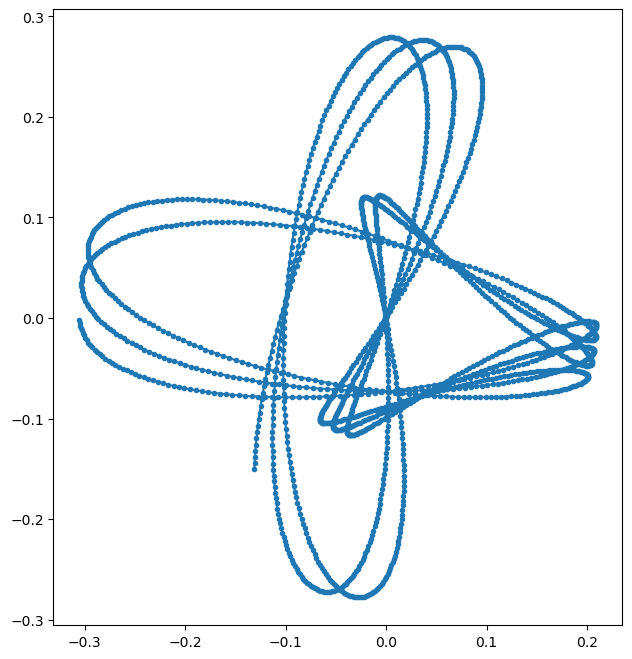

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(test[:, 0], test[:, 1], ".-")

ax.set_aspect("equal", "box")
# plt.subplots_adjust(left=0.075, right=.999, top=.9, bottom=.001)
print("test1")
# fig.savefig('/home/thomas/pattern_random_0.pdf', transparent=True, dpi=600)
print("test2")

TkAgg
